In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [3]:
data = pd.read_csv('DATA4.csv',delimiter=',')

In [4]:
x = np.array(data.drop(columns=['S11','S12','S22','S33']))
y = np.array(data.drop(columns=['LE11','LE12','LE22','LE33','PE11','PE12','PE22','PE33','S33']))
a = np.linspace(0,10,len(x)) #for plotting

## Feature scaling

In [5]:
# Define functions for feature scaling

def min_max_norm(x):
    return (x-x.min(axis=0))/(x.max(axis=0)-x.min(axis=0))

def z_score_norm_standardisation(x):
    return (x-x.mean(axis=0))/(x.std(axis=0))

In [6]:
# Perform feature scaling using defined functions
x_mm = min_max_norm(x)
y_mm = min_max_norm(y)
x_std    = z_score_norm_standardisation(x)
y_std    = z_score_norm_standardisation(y)

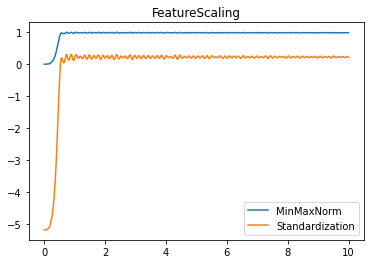

In [7]:
# Plot to compare different scaling techniques
plt.title('FeatureScaling')
plt.plot(a,x_mm[:,1],label='MinMaxNorm')
plt.plot(a,x_std[:,1],label='Standardization')
plt.legend()

In [8]:
# Initialize scalers from scikit learn
minmax = MinMaxScaler()
zscore = StandardScaler()

In [9]:
# Perform feature scaling using scikitlearn scalers
x_skmm  = minmax.fit_transform(x)
y_skmm  = minmax.fit_transform(y)

x_skstd = zscore.fit_transform(x)
y_skstd = zscore.fit_transform(y)

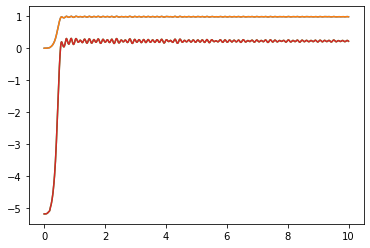

In [10]:
# Compare defined functions and scikitlearn scalers
plt.plot(a,x_mm[:,1],label='MinMaxNorm')
plt.plot(a,x_skmm[:,1],label='MinMaxNorm_Sklearn')
plt.plot(a,x_std[:,1],label='ZscoreNorm')
plt.plot(a,x_skstd[:,1],label='ZscoreNorm_Sklearn')

In [11]:
model = models.Sequential()

model.add(layers.Dense(10, activation='relu',use_bias=True, input_shape= (x.shape[1],)))
model.add(layers.Dense(y.shape[1], use_bias=True, activation='linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                100       
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 44        
Total params: 144
Trainable params: 144
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer='RMSProp', loss='mse', metrics=['mae', 'mse'])

In [13]:
history1 = model.fit(x, y, epochs=10,verbose=2)

Epoch 1/10
32/32 - 0s - loss: 1182751852068864.0000 - mae: 20543394.0000 - mse: 1182751852068864.0000
Epoch 2/10
32/32 - 0s - loss: 1182751583633408.0000 - mae: 20543396.0000 - mse: 1182751583633408.0000
Epoch 3/10
32/32 - 0s - loss: 1182751583633408.0000 - mae: 20543394.0000 - mse: 1182751583633408.0000
Epoch 4/10
32/32 - 0s - loss: 1182751583633408.0000 - mae: 20543394.0000 - mse: 1182751583633408.0000
Epoch 5/10
32/32 - 0s - loss: 1182751717851136.0000 - mae: 20543396.0000 - mse: 1182751717851136.0000
Epoch 6/10
32/32 - 0s - loss: 1182751717851136.0000 - mae: 20543396.0000 - mse: 1182751717851136.0000
Epoch 7/10
32/32 - 0s - loss: 1182751852068864.0000 - mae: 20543396.0000 - mse: 1182751852068864.0000
Epoch 8/10
32/32 - 0s - loss: 1182751717851136.0000 - mae: 20543396.0000 - mse: 1182751717851136.0000
Epoch 9/10
32/32 - 0s - loss: 1182751852068864.0000 - mae: 20543394.0000 - mse: 1182751852068864.0000
Epoch 10/10
32/32 - 0s - loss: 1182751449415680.0000 - mae: 20543392.0000 - mse: 1

In [14]:
history2 = model.fit(x_mm,y_mm, epochs=10,verbose=2)

Epoch 1/10
32/32 - 0s - loss: 5.6300 - mae: 1.8392 - mse: 5.6300
Epoch 2/10
32/32 - 0s - loss: 5.0788 - mae: 1.7339 - mse: 5.0788
Epoch 3/10
32/32 - 0s - loss: 4.5325 - mae: 1.6200 - mse: 4.5325
Epoch 4/10
32/32 - 0s - loss: 3.9590 - mae: 1.4905 - mse: 3.9590
Epoch 5/10
32/32 - 0s - loss: 3.3099 - mae: 1.3350 - mse: 3.3099
Epoch 6/10
32/32 - 0s - loss: 2.5906 - mae: 1.1530 - mse: 2.5906
Epoch 7/10
32/32 - 0s - loss: 1.8856 - mae: 0.9574 - mse: 1.8856
Epoch 8/10
32/32 - 0s - loss: 1.1947 - mae: 0.7375 - mse: 1.1947
Epoch 9/10
32/32 - 0s - loss: 0.5616 - mae: 0.4973 - mse: 0.5616
Epoch 10/10
32/32 - 0s - loss: 0.1832 - mae: 0.3114 - mse: 0.1832


In [15]:
history3 = model.fit(x_std,y_std, epochs=10,verbose=2)

Epoch 1/10
32/32 - 0s - loss: 2.4274 - mae: 1.2658 - mse: 2.4274
Epoch 2/10
32/32 - 0s - loss: 1.7317 - mae: 1.0316 - mse: 1.7317
Epoch 3/10
32/32 - 0s - loss: 1.3323 - mae: 0.8818 - mse: 1.3323
Epoch 4/10
32/32 - 0s - loss: 1.0956 - mae: 0.7955 - mse: 1.0956
Epoch 5/10
32/32 - 0s - loss: 0.9598 - mae: 0.7465 - mse: 0.9598
Epoch 6/10
32/32 - 0s - loss: 0.8720 - mae: 0.7127 - mse: 0.8720
Epoch 7/10
32/32 - 0s - loss: 0.7993 - mae: 0.6803 - mse: 0.7993
Epoch 8/10
32/32 - 0s - loss: 0.7350 - mae: 0.6472 - mse: 0.7350
Epoch 9/10
32/32 - 0s - loss: 0.6801 - mae: 0.6146 - mse: 0.6801
Epoch 10/10
32/32 - 0s - loss: 0.6322 - mae: 0.5856 - mse: 0.6322


# Overfitting and Underfitting

In [16]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [17]:
dataset = pd.read_csv('DATA5.csv',delimiter=',')
dataset.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [18]:
dataset.dropna(inplace=True)

In [19]:
dataset = dataset.drop(columns=['Suburb','Address','CouncilArea'])

In [20]:
dataset = pd.get_dummies(dataset, drop_first=True)

In [21]:
dataset.shape

(48433, 550)

In [22]:
m = min_max_norm(dataset.drop('Price',axis=1))
n = min_max_norm(dataset['Price'])

In [23]:
m_train,m_test,n_train,n_test = train_test_split(m,n,test_size=0.20,random_state=27)

In [24]:
from sklearn.linear_model import LinearRegression

LinearModel = LinearRegression().fit(m_train,n_train)

In [25]:
LinearModel.score(m_test, n_test)

-4.386500625981661e+19

In [26]:
LinearModel.score(m_train, n_train)

0.5856221198335252

In [27]:
from sklearn import linear_model

lasso_reg = linear_model.Lasso(alpha=0.01,max_iter=100,tol=0.1)

lasso_reg.fit(m_train,n_train)

Lasso(alpha=0.01, max_iter=100, tol=0.1)

In [28]:
lasso_reg.score(m_test,n_test)

-3.512290424967368e-05

In [29]:
ridge_reg = linear_model.Ridge(alpha=10,max_iter=100,tol=0.1)

ridge_reg.fit(m_train,n_train)

Ridge(alpha=10, max_iter=100, tol=0.1)

In [30]:
ridge_reg.score(m_test,n_test)

0.5616153023076861

### Evaluating Machine learning models

In [31]:
x_scaled = minmax.fit_transform(x)
y_scaled = minmax.fit_transform(y)

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y_scaled,test_size = 0.2, random_state=27)

In [33]:
matmodel = models.Sequential()

matmodel.add(layers.Dense(10, activation='relu',use_bias=True, input_shape= (x_train.shape[1],)))
matmodel.add(layers.Dense(10, activation='relu',use_bias=True))                                       
# matmodel.add(layers.Dense(10, activation='relu',use_bias=True))
# matmodel.add(layers.Dense(10, activation='relu',use_bias=True))
matmodel.add(layers.Dense(y_train.shape[1], use_bias=True, activation='linear'))

matmodel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                100       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 44        
Total params: 254
Trainable params: 254
Non-trainable params: 0
_________________________________________________________________


In [34]:
matmodel.compile(optimizer='RMSProp', loss='mse', metrics=['mae', 'mse'])

In [35]:
matmodel.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,verbose=1)

Epoch 1/100
25/25 [==============================] - 0s 5ms/step - loss: 0.2569 - mae: 0.4450 - mse: 0.2569 - val_loss: 0.1640 - val_mae: 0.3343 - val_mse: 0.1640
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.1409 - mae: 0.3024 - mse: 0.1409 - val_loss: 0.1033 - val_mae: 0.2599 - val_mse: 0.1033
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0817 - mae: 0.2272 - mse: 0.0817 - val_loss: 0.0565 - val_mae: 0.1907 - val_mse: 0.0565
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0488 - mae: 0.1771 - mse: 0.0488 - val_loss: 0.0467 - val_mae: 0.1764 - val_mse: 0.0467
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0410 - mae: 0.1637 - mse: 0.0410 - val_loss: 0.0438 - val_mae: 0.1720 - val_mse: 0.0438
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0376 - mae: 0.1583 - mse: 0.0376 - val_loss: 0.0406 - val_mae: 0.1667 - val_mse: 0.0406
Epoch 7/100
25/25 [===

25/25 [==============================] - 0s 1ms/step - loss: 0.0157 - mae: 0.0843 - mse: 0.0157 - val_loss: 0.0194 - val_mae: 0.0939 - val_mse: 0.0194
Epoch 52/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0152 - mae: 0.0836 - mse: 0.0152 - val_loss: 0.0193 - val_mae: 0.0936 - val_mse: 0.0193
Epoch 53/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0154 - mae: 0.0838 - mse: 0.0154 - val_loss: 0.0196 - val_mae: 0.0943 - val_mse: 0.0196
Epoch 54/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0152 - mae: 0.0827 - mse: 0.0152 - val_loss: 0.0193 - val_mae: 0.0943 - val_mse: 0.0193
Epoch 55/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0154 - mae: 0.0828 - mse: 0.0154 - val_loss: 0.0192 - val_mae: 0.0926 - val_mse: 0.0192
Epoch 56/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0152 - mae: 0.0821 - mse: 0.0152 - val_loss: 0.0192 - val_mae: 0.0933 - val_mse: 0.0192
Epoch 57/100
25/25 [=========

## K-Fold Cross Validation with holdout

In [36]:
from sklearn import metrics
from scipy.stats import zscore
from sklearn.model_selection import KFold

kf = KFold(5, shuffle=True, random_state=42)
    
sample_y = []
sample_pred = []
fold = 0
for train, test in kf.split(x_train):        
    fold+=1
    print("Fold :: {}".format(fold))
        
    x_tr = x_train[train]
    y_tr = y_train[train]
    x_te = x_train[test]
    y_te = y_train[test]
    
    kfmodel = models.Sequential()
    kfmodel.add(layers.Dense(10, activation='relu',use_bias=True, input_shape= (x_tr.shape[1],)))
    kfmodel.add(layers.Dense(10, activation='relu',use_bias=True))                                  
    kfmodel.add(layers.Dense(y_train.shape[1], use_bias=True, activation='linear'))
    
    kfmodel.compile(optimizer='RMSProp', loss='mse', metrics=['mae', 'mse'])
    
    kfmodel.fit(x_tr,y_tr,validation_data=(x_te,y_te),verbose=0,epochs=1000)
    
    pred = kfmodel.predict(x_te)
    
    sample_y.append(y_te)
    sample_pred.append(pred) 

    # Measure 
    score = np.sqrt(metrics.mean_squared_error(pred,y_te))
    print("Fold score (RMSE)        :: {}".format(score))


# Build the out of sample prediction list and calculate the error.
sample_y = np.concatenate(sample_y)
sample_pred = np.concatenate(sample_pred)
score = np.sqrt(metrics.mean_squared_error(sample_pred,sample_y))
print()
print("Cross-validated score (RMSE):: {}".format(score))    
    
# Write the cross-validated prediction (from the last neural network)
holdout_pred = kfmodel.predict(x_test)

score = np.sqrt(metrics.mean_squared_error(holdout_pred,y_test))
print("Holdout score (RMSE)     :: {}".format(score))

Fold :: 1
Fold score (RMSE)        :: 0.028730184300115525
Fold :: 2
Fold score (RMSE)        :: 0.03477439222947522
Fold :: 3
Fold score (RMSE)        :: 0.041950331290586125
Fold :: 4
Fold score (RMSE)        :: 0.03877689552765822
Fold :: 5
Fold score (RMSE)        :: 0.02377906432812682

Cross-validated score (RMSE):: 0.03424501034405458
Holdout score (RMSE)     :: 0.0371552554513053
